# BASICS OF PYTHON | SESSION 5

---
Sina Shafiezadeh | April 2023
---


Please follow the next steps over the next 3 hours in order to complete your exam successfully:


1. Download **Spotify Song Attributes** dataset from [HERE](https://www.kaggle.com/datasets/geomack/spotifyclassification).
2. Import dataset in **Google Colab**.
3. Overview dataset and define **one reasonable question**. An important point is to select a question that you will be able to implement statistical tests and plotting.
4. **Preprocess** the dataset to start your analysis.
5. Implement the **statistical models**.
6. **Plot** your results.
7. Set up your **GitHub** account. You can get help from this [LINK](https://docs.aws.amazon.com/codedeploy/latest/userguide/tutorials-github-create-github-account.html).
8. Upload your code and results in a **repository**.
9. Modify the repository title and description then **publish it**.
10. **Send your public repository** to me by email (sina.shafiezadeh@studenti.unipd.it).


# 1.&nbsp;Data Importing

In [56]:
# import packages
import pandas as pd
import numpy as np

In [57]:
data = pd.read_csv('data.csv')

i want to know correlation between 'acousticness' and 'energy' and the top 10 artists and their songs with the most energy



In [58]:
print(data)

      Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0              0       0.01020         0.833       204600   0.434   
1              1       0.19900         0.743       326933   0.359   
2              2       0.03440         0.838       185707   0.412   
3              3       0.60400         0.494       199413   0.338   
4              4       0.18000         0.678       392893   0.561   
...          ...           ...           ...          ...     ...   
2012        2012       0.00106         0.584       274404   0.932   
2013        2013       0.08770         0.894       182182   0.892   
2014        2014       0.00857         0.637       207200   0.935   
2015        2015       0.00164         0.557       185600   0.992   
2016        2016       0.00281         0.446       204520   0.915   

      instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0             0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1            

In [59]:
print(data.shape)

(2017, 17)


In [60]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [61]:
print(data.describe())

        Unnamed: 0  acousticness  danceability   duration_ms       energy  \
count  2017.000000   2017.000000   2017.000000  2.017000e+03  2017.000000   
mean   1008.000000      0.187590      0.618422  2.463062e+05     0.681577   
std     582.402066      0.259989      0.161029  8.198181e+04     0.210273   
min       0.000000      0.000003      0.122000  1.604200e+04     0.014800   
25%     504.000000      0.009630      0.514000  2.000150e+05     0.563000   
50%    1008.000000      0.063300      0.631000  2.292610e+05     0.715000   
75%    1512.000000      0.265000      0.738000  2.703330e+05     0.846000   
max    2016.000000      0.995000      0.984000  1.004627e+06     0.998000   

       instrumentalness          key     liveness     loudness         mode  \
count       2017.000000  2017.000000  2017.000000  2017.000000  2017.000000   
mean           0.133286     5.342588     0.190844    -7.085624     0.612295   
std            0.273162     3.648240     0.155453     3.761684     0.

# 2.&nbsp;Data Cleaning (overview)

In [62]:
print(data['acousticness'].value_counts())
print("================================")
print(data['energy'].value_counts())

0.119000    8
0.114000    6
0.273000    6
0.135000    6
0.160000    6
           ..
0.000294    1
0.009690    1
0.000076    1
0.041600    1
0.008570    1
Name: acousticness, Length: 1394, dtype: int64
0.857    10
0.657     9
0.860     9
0.770     9
0.793     9
         ..
0.618     1
0.726     1
0.317     1
0.994     1
0.932     1
Name: energy, Length: 719, dtype: int64


# 3.&nbsp;Data Cleaning (interpretability)

In [63]:
data["energy"] = data["energy"].fillna(data["energy"].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [64]:
data["acousticness"] = data["acousticness"].fillna(data["acousticness"].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


# 4.&nbsp;Data Cleaning (reduction)

In [65]:
new_data = data[['acousticness', 'energy']] 
print(new_data)

      acousticness  energy
0          0.01020   0.434
1          0.19900   0.359
2          0.03440   0.412
3          0.60400   0.338
4          0.18000   0.561
...            ...     ...
2012       0.00106   0.932
2013       0.08770   0.892
2014       0.00857   0.935
2015       0.00164   0.992
2016       0.00281   0.915

[2017 rows x 2 columns]


# 5.&nbsp;Data Cleaning (noisy data)

# 6.&nbsp;Data Cleaning (completeness)

# 7.&nbsp;Data Exploring


In [66]:
new_data.corr()  #there is a negative correlation between 'acousticness' and 'energy'

,acousticness,energy
acousticness,1.000000,-0.646319
energy,-0.646319,1.000000


# 8.&nbsp;Data Analysis

# 9.&nbsp;Data Visualization

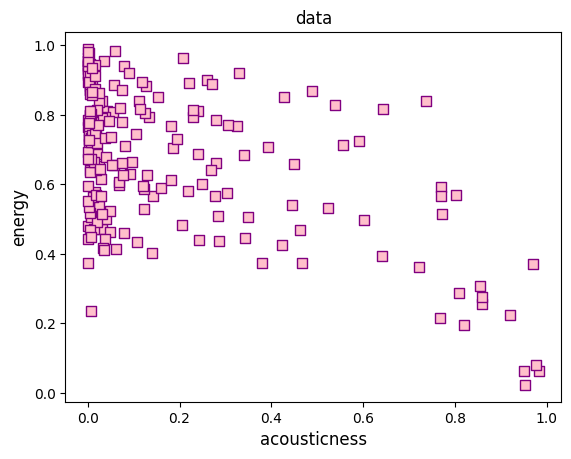

In [67]:
import matplotlib.pyplot as plt

subset_data = data.sample(frac=0.1) # Select a random 10% sample of the data

x = subset_data["acousticness"]
 
y = subset_data["energy"]
  
plt.scatter(x, y, c ="pink",
            linewidths = 1,
            marker ="s",   
            edgecolor ="purple",
            s = 50)
 
plt.xlabel("acousticness",fontsize=12)
plt.ylabel("energy",fontsize=12)
plt.title("data",fontsize=12)
plt.show()

# there is probably a relationship between the variables, but it may be non-linear

In [68]:
top10_artists_energy = data[["energy","song_title","artist"]].sort_values(by="energy",ascending=False)[:10]
top10_artists_energy  #i want to know the top 10 artists and their songs with the most energy


,energy,song_title,artist
1299,0.998,No Absolution,Thy Art Is Murder
1322,0.997,Pitchblack,Walking Dead On Broadway
1297,0.994,A Darkened Gospel,A Wake in Providence
1347,0.993,Unanswered,Suicide Silence
2015,0.992,First Contact,Twin Moons
1680,0.992,Paranoia,A Day To Remember
1332,0.992,Beautiful Agony,Within The Ruins
1328,0.991,Down into the Abyss,Conjonctive
1681,0.990,Hated,Beartooth
1296,0.990,Black Colors,Victim Of Deception


# 10.&nbsp;Data Exporting